In [7]:
import numpy as np
import pandas as pd
%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
covid = pd.read_csv("COVID.csv")

/Applications/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
covid.shape

(174096, 53)

In [104]:
covid['alpha_3_code']

0         AUT
1         AUT
2         AUT
3         AUT
4         AUT
         ... 
174091    USA
174092    USA
174093    USA
174094    USA
174095    VNM
Name: alpha_3_code, Length: 174096, dtype: object

In [105]:
covid = covid.loc[covid['alpha_3_code'] == 'USA']

In [12]:
covid.shape

(29016, 53)

In [13]:
covid.isnull().sum()

country_name                                   0
alpha_3_code                                   0
region_name                                  558
region_code                                  558
date                                           0
school_closing                               421
school_closing_flag                         4571
school_closing_notes                       26879
workplace_closing                            436
workplace_closing_flag                      4121
workplace_closing_notes                    26980
cancel_public_events                         413
cancel_public_events_flag                   4128
cancel_public_events_notes                 27393
restrictions_on_gatherings                   392
restrictions_on_gatherings_flag             8805
restrictions_on_gatherings_notes           27323
close_public_transit                         455
close_public_transit_flag                  18049
close_public_transit_notes                 27999
stay_at_home_require

In [106]:
covid.dropna(axis=0, how="all")

,country_name,alpha_3_code,region_name,region_code,date,school_closing,school_closing_flag,school_closing_notes,workplace_closing,workplace_closing_flag,...,contact_tracing_notes,emergency_healthcare_investment,emergency_healthcare_investment_notes,vaccine_investment,vaccine_investment_notes,misc_wildcard,misc_wildcard_notes,confirmed_cases,deaths,stringency_index
8,United States,USA,Hawaii,US_HI,2021-06-26,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,37596.0,516.0,NaN
9,United States,USA,Hawaii,US_HI,2021-06-27,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,37647.0,516.0,NaN
10,United States,USA,Hawaii,US_HI,2021-06-28,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,37669.0,516.0,NaN
11,United States,USA,Hawaii,US_HI,2021-06-29,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,37702.0,516.0,NaN
12,United States,USA,Hawaii,US_HI,2021-06-30,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,37758.0,517.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174090,United States,USA,Kentucky,US_KY,2020-03-15,1.0,1.0,NaN,2.0,0.0,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,18.0,0.0,42.59
174091,United States,USA,Nebraska,US_NE,2020-03-16,2.0,0.0,"The Omaha Public Schools and the Millard, Papi...",1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,0.0,45.37
174092,United States,USA,Nevada,US_NV,2020-03-13,1.0,1.0,"On March 13, the CDC released guidance recomme...",1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,0.0,26.85
174093,United States,USA,Utah,US_UT,2020-03-15,2.0,1.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,0.0,36.11


In [107]:
covid = covid[["country_name", "alpha_3_code", "region_name", "date", "confirmed_cases", "deaths", "stringency_index"]]

In [16]:
covid.head()

,country_name,alpha_3_code,region_name,date,confirmed_cases,deaths,stringency_index
8,United States,USA,Hawaii,2021-06-26,37596.0,516.0,NaN
9,United States,USA,Hawaii,2021-06-27,37647.0,516.0,NaN
10,United States,USA,Hawaii,2021-06-28,37669.0,516.0,NaN
11,United States,USA,Hawaii,2021-06-29,37702.0,516.0,NaN
12,United States,USA,Hawaii,2021-06-30,37758.0,517.0,NaN


In [108]:
covid.dtypes

country_name         object
alpha_3_code         object
region_name          object
date                 object
confirmed_cases     float64
deaths              float64
stringency_index    float64
dtype: object

In [109]:
covid.to_csv("covid_us.csv")

In [110]:
# Created a file by combining covid data and ZORI datset in 'R'; did all the cleaning and filling in the missing observations in R. Saved it as csv, which I am calling here
zori_covid = pd.read_csv("zori_covid.csv")

In [20]:
zori_covid.shape

(3847, 7)

In [21]:
zori_covid.head()

,state.name,Year,Month,medZORI,confirmed_cases,deaths,stringency_index
0,Alabama,2014,1,993.0,0,0,0.0
1,Alabama,2014,2,874.0,0,0,0.0
2,Alabama,2014,3,895.0,0,0,0.0
3,Alabama,2014,4,997.5,0,0,0.0
4,Alabama,2014,5,827.0,0,0,0.0


<AxesSubplot:xlabel='confirmed_cases', ylabel='medZORI'>

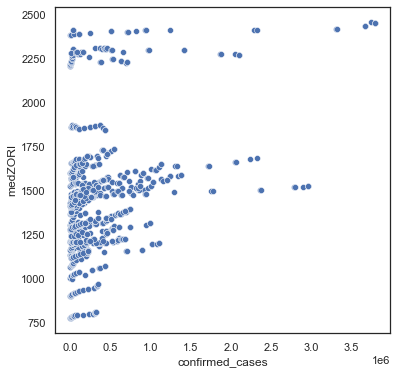

In [115]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set_style("white")
zori_covid1 = zori_covid[zori_covid['Year'] >=2020]
zori_covid1 = zori_covid1[zori_covid1['confirmed_cases']>10]
sns.scatterplot(x= 'confirmed_cases', y='medZORI', data=zori_covid1)

<AxesSubplot:xlabel='deaths', ylabel='medZORI'>

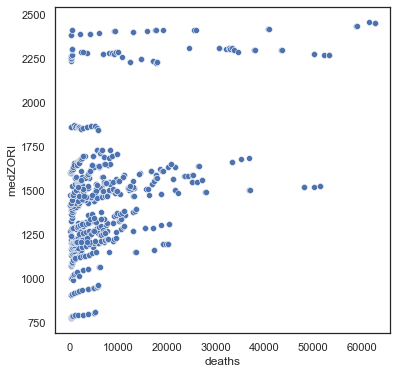

In [126]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set_style("white")
zori_covid1 = zori_covid[zori_covid['Year'] >=2020]
zori_covid1 = zori_covid1[zori_covid1['deaths']>100]
sns.scatterplot(x= 'deaths', y='medZORI', data=zori_covid1)

<AxesSubplot:xlabel='stringency_index', ylabel='medZORI'>

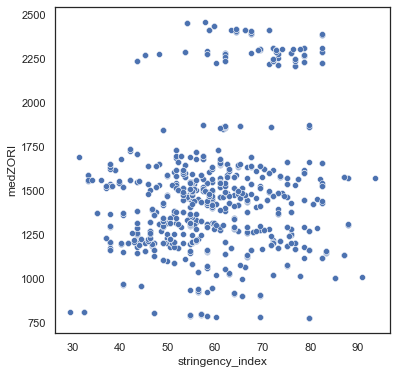

In [125]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set_style("white")
zori_covid1 = zori_covid[zori_covid['Year'] >=2020]
zori_covid1 = zori_covid1[zori_covid1['stringency_index']>20]
sns.scatterplot(x= 'stringency_index', y='medZORI', data=zori_covid1)

<AxesSubplot:xlabel='Month', ylabel='stringency_index'>

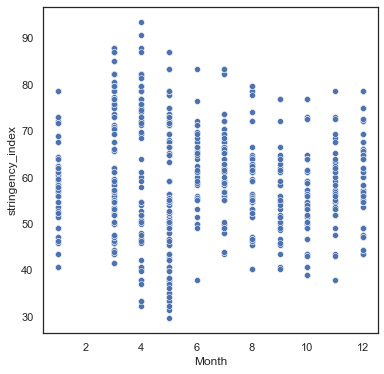

In [127]:
zori_covid1 = zori_covid[zori_covid['Year'] >=2020]
#zori_covid1 = zori_covid1[zori_covid1['stringency_index']>20]
sns.scatterplot(x= 'Month', y='stringency_index', data=zori_covid1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

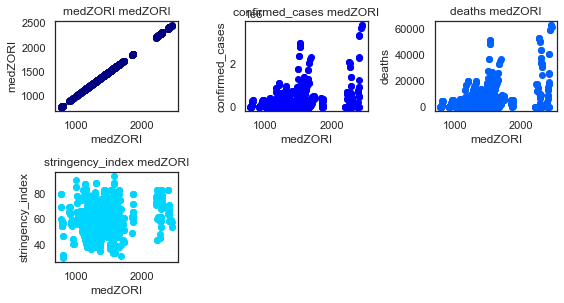

In [130]:
jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,10)))
 
def correlation(zori_covid1,variables, n_rows, n_cols):
    fig = plt.figure(figsize=(8,6))
    #fig = plt.figure(figsize=(14,9))
    for i, var in enumerate(variables):
        ax = fig.add_subplot(n_rows,n_cols,i+1)
        asset = zori_covid1.loc[:,var]
        ax.scatter(zori_covid1["medZORI"], asset, c = next(colors))
        ax.set_xlabel("medZORI")
        ax.set_ylabel("{}".format(var))
        ax.set_title(var +" medZORI")
    fig.tight_layout() 
    plt.show()
        
# Take the name of the last 6 columns of the SPY_data which are the model features
variables = zori_covid1.columns[-4:]
 
correlation(zori_covid1,variables,3,3)

In [23]:
# Import packages
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [24]:
#Model covid- No transformation of dependent or independent feature but applying normalization during LinearRegression
covidX = zori_covid.drop(["medZORI", "state.name"], axis =1)
covidy = zori_covid["medZORI"]

In [25]:
#Model covid Split into test and train sets
covidX_train, covidX_test, covidy_train, covidy_test = train_test_split(covidX, covidy, random_state=2, test_size=0.2)

In [26]:
# Model covid linear regression with normalization=true
covid_ols = LinearRegression(normalize = True)
covid_ols.fit(covidX_train, covidy_train)

LinearRegression(normalize=True)

In [27]:
#Scores for train and test sets
print("R^2 for train set: %f" %covid_ols.score(covidX_train, covidy_train))

print('-'*30)

print("R^2 for test  set: %f" %covid_ols.score(covidX_test, covidy_test))

R^2 for train set: 0.125745
------------------------------
R^2 for test  set: 0.084600


In [28]:
# RMSE for covid
mean_squared_error(covidy_test, covid_ols.predict(covidX_test), squared = False)

342.82555634040557

#### Using ony 2020 and 2021 data

In [29]:
#Model covid2- No transformation of dependent or independent feature but applying normalization during LinearRegression
covid2X = zori_covid1.drop(["medZORI", "state.name"], axis =1)
covid2y = zori_covid1["medZORI"]

In [30]:
#Model covid2 Split into test and train sets
covid2X_train, covid2X_test, covid2y_train, covid2y_test = train_test_split(covid2X, covid2y, random_state=2, test_size=0.2)

In [31]:
# Model covid2 linear regression with normalization=true
covid2_ols = LinearRegression(normalize = True)
covid2_ols.fit(covid2X_train, covid2y_train)

LinearRegression(normalize=True)

In [32]:
#Scores for train and test sets
print("R^2 for train set: %f" %covid2_ols.score(covid2X_train, covid2y_train))

print('-'*30)

print("R^2 for test  set: %f" %covid2_ols.score(covid2X_test, covid2y_test))

R^2 for train set: 0.174912
------------------------------
R^2 for test  set: 0.110325


In [33]:
# RMSE for covid2
mean_squared_error(covid2y_test, covid2_ols.predict(covid2X_test), squared = False)

360.4247679658749

In [34]:
zori_covid1.head()

,state.name,Year,Month,medZORI,confirmed_cases,deaths,stringency_index
72,Alabama,2020,1,1208.0,0,0,0.00
73,Alabama,2020,1,1208.0,0,0,0.00
74,Alabama,2020,2,1211.0,0,0,0.00
75,Alabama,2020,3,1215.0,1001,10,73.61
76,Alabama,2020,3,1215.0,1063,23,73.61


### House Price Index Dataset

In [35]:
hpi = pd.read_csv("house_price_index_zip.csv")

In [36]:
hpi.head()

,Five-Digit ZIP Code,Year,Annual Change (%),HPI,HPI with 1990 base,HPI with 2000 base
0,1001,1985,.,100,62.15,61.41
1,1001,1986,13.67,113.67,70.65,69.8
2,1001,1987,21.2,137.77,85.63,84.6
3,1001,1988,17.38,161.72,100.52,99.31
4,1001,1989,1.14,163.57,101.67,100.45


In [37]:
hpi_formerge = hpi[hpi["Year"]>=2014]
hpi_formerge = hpi_formerge.drop(["HPI with 1990 base", "HPI with 2000 base"], axis =1)

In [38]:
print(hpi.shape)
print(hpi_formerge.shape)

(583050, 6)
(130149, 4)


In [39]:
hpi_formerge.head()

,Five-Digit ZIP Code,Year,Annual Change (%),HPI
29,1001,2014,1.52,244.69
30,1001,2015,1.46,248.25
31,1001,2016,2.39,254.19
32,1001,2017,2.01,259.31
33,1001,2018,6.11,275.16


In [40]:
# Cleaning the "Annual Change column"
hpi_formerge= hpi_formerge[hpi_formerge["Annual Change (%)"]!= "."]

In [41]:
# Converted the object types to floats
hpi_formerge["Annual Change (%)"] = pd.to_numeric(hpi_formerge["Annual Change (%)"], downcast="float")
hpi_formerge["HPI"] = pd.to_numeric(hpi_formerge["HPI"], downcast="float")

In [42]:
hpi_formerge = hpi_formerge.rename(columns = {"Five-Digit ZIP Code": "RegionName"})

In [43]:
hpi_formerge.shape

(122010, 4)

In [44]:
hpi_formerge.dtypes

RegionName             int64
Year                   int64
Annual Change (%)    float32
HPI                  float32
dtype: object

In [45]:
# Had Created zacs_edu1.csv in R
zacs_edu1 = pd.read_csv("zacs_edu1.csv", index_col =0)

In [46]:
# Merging HPI with zacs_edu1
zacs_edu_hpi= pd.merge(zacs_edu1, hpi_formerge, how ='inner', on = ['RegionName', 'Year'])

In [47]:
zacs_edu_hpi.shape

(171558, 38)

In [48]:
zacs_edu_hpi.to_csv("zacs_edu_hpi.csv")

In [49]:
#Separating X and y variables
zacs_edu_hpiX= zacs_edu_hpi.drop(["ZORI"], axis =1)
zacs_edu_hpiy = zacs_edu_hpi["ZORI"]

In [50]:
#Separating X and y variables for Model 6 which contains "edu" columns
model6X = zacs_edu1.drop(["ZORI"], axis =1)
model6y = zacs_edu1["ZORI"]

In [51]:
#Split into test and train sets for Model zacs_edu_hpi
zacs_edu_hpiX_train, zacs_edu_hpiX_test, zacs_edu_hpiy_train, zacs_edu_hpiy_test = train_test_split(zacs_edu_hpiX, zacs_edu_hpiy, random_state=2, test_size=0.2)

In [52]:
# Model zacs_edu_hpi linear regression
zacs_edu_hpi_ols = LinearRegression(normalize =True)
zacs_edu_hpi_ols.fit(zacs_edu_hpiX, zacs_edu_hpiy)

LinearRegression(normalize=True)

In [53]:
#Scores for train and test sets for Model zacs_edu_hpi
print("R^2 for train set: %f" %zacs_edu_hpi_ols.score(zacs_edu_hpiX_train, zacs_edu_hpiy_train))

print('-'*30)

print("R^2 for test  set: %f" %zacs_edu_hpi_ols.score(zacs_edu_hpiX_test, zacs_edu_hpiy_test))

R^2 for train set: 0.470825
------------------------------
R^2 for test  set: 0.473932


In [54]:
# RMSE for model zacs_edu_hpi; addition of the graduation rate column had really messed up R2 and RMSE
mean_squared_error(zacs_edu_hpiy_test, zacs_edu_hpi_ols.predict(zacs_edu_hpiX_test), squared = False)

527.0463854698545

#### Removing the high-priced observations and testing one more time

In [55]:
# Removing the high-priced observations and testing one more time
indices = zacs_edu_hpi['ZORI'] <4000
zacs_edu_hpi = zacs_edu_hpi[indices]

In [56]:
#Separating X and y variables
zacs_edu_hpiX= zacs_edu_hpi.drop(["ZORI"], axis =1)
zacs_edu_hpiy = zacs_edu_hpi["ZORI"]

In [57]:
#Split into test and train sets for Model zacs_edu_hpi
zacs_edu_hpiX_train, zacs_edu_hpiX_test, zacs_edu_hpiy_train, zacs_edu_hpiy_test = train_test_split(zacs_edu_hpiX, zacs_edu_hpiy, random_state=2, test_size=0.2)

In [58]:
# Model zacs_edu_hpi linear regression
zacs_edu_hpi_ols = LinearRegression(normalize =True)
zacs_edu_hpi_ols.fit(zacs_edu_hpiX, zacs_edu_hpiy)

LinearRegression(normalize=True)

In [59]:
#Scores for train and test sets for Model zacs_edu_hpi
print("R^2 for train set: %f" %zacs_edu_hpi_ols.score(zacs_edu_hpiX_train, zacs_edu_hpiy_train))

print('-'*30)

print("R^2 for test  set: %f" %zacs_edu_hpi_ols.score(zacs_edu_hpiX_test, zacs_edu_hpiy_test))

R^2 for train set: 0.844465
------------------------------
R^2 for test  set: 0.845030


In [60]:
# RMSE for model zacs_edu_hpi; addition of the graduation rate column really messed R2 and RMSE
mean_squared_error(zacs_edu_hpiy_test, zacs_edu_hpi_ols.predict(zacs_edu_hpiX_test), squared = False)

196.52544106185735

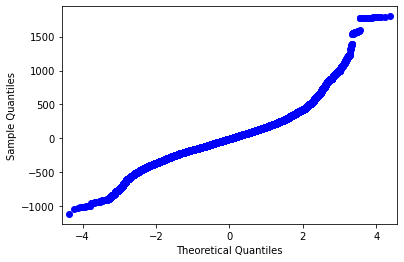

                            OLS Regression Results                            
Dep. Variable:                   ZORI   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                 2.516e+04
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        05:48:50   Log-Likelihood:            -1.1488e+06
No. Observations:              171364   AIC:                         2.298e+06
Df Residuals:                  171326   BIC:                         2.298e+06
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [61]:
# Statsmodel to get the p-values
import statsmodels.api as sm 
zacs_edu_hpiX_add_const = sm.add_constant(zacs_edu_hpiX)
zacs_edu_hpi_sm = sm.OLS(zacs_edu_hpiy, zacs_edu_hpiX_add_const)
fitted = zacs_edu_hpi_sm.fit()
res = fitted.resid
fig = sm.qqplot(res)
plt.show()
print(fitted.summary())

#### LassoCV to determine optimal lambda

In [62]:
zacs_edu_hpi

,RegionID,RegionName,ZORI,Year,Month,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_median_value,married_households,housing_units_renter_occupied,nonfamily_households,...,white_pop,black_pop,hispanic_pop,walked_to_work,commuters_by_public_transportation,commute_10_14_mins,gini_index,ALL_RATE,Annual Change (%),HPI
0,91982,77494,1523,2014,1,1366,277300,19015,3530,3539,...,48223,5343,12793,69,714,2896,0.3545,93.0,12.65,200.389999
1,91982,77494,1523,2014,1,1366,277300,19015,3530,3539,...,48223,5343,12793,69,714,2896,0.3545,98.0,12.65,200.389999
2,91982,77494,1523,2014,1,1366,277300,19015,3530,3539,...,48223,5343,12793,69,714,2896,0.3545,99.0,12.65,200.389999
3,91982,77494,1526,2014,2,1366,277300,19015,3530,3539,...,48223,5343,12793,69,714,2896,0.3545,93.0,12.65,200.389999
4,91982,77494,1526,2014,2,1366,277300,19015,3530,3539,...,48223,5343,12793,69,714,2896,0.3545,98.0,12.65,200.389999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171553,95039,85701,1011,2018,6,844,256100,562,2064,1821,...,2644,192,1915,280,217,474,0.5268,90.0,0.32,353.200012
171554,95039,85701,1017,2018,7,844,256100,562,2064,1821,...,2644,192,1915,280,217,474,0.5268,90.0,0.32,353.200012
171555,95039,85701,1021,2018,8,844,256100,562,2064,1821,...,2644,192,1915,280,217,474,0.5268,90.0,0.32,353.200012
171556,95039,85701,1026,2018,9,844,256100,562,2064,1821,...,2644,192,1915,280,217,474,0.5268,90.0,0.32,353.200012


In [84]:
zacsehX= zacs_edu_hpi.drop(["ZORI", "Month"], axis =1)
#zacsehy = zacs_edu_hpi["ZORI"]

In [85]:
#Split into test and train sets for Model zacs_edu_hpi
zacsehX_train, zacsehX_test, zacsehy_train, zacsehy_test = train_test_split(zacsehX, zacs_edu_hpiy, random_state=2, test_size=0.2)

In [86]:
#Run LassoCV to determine optimal lambda/alpha
from sklearn.linear_model import LassoCV
zacseh_lasso = LassoCV() 

zacseh_lasso.set_params(cv = 5, random_state = 2, alphas = np.linspace(0.001,0.01,100), normalize=True, n_jobs =-1, max_iter=2500)
zacseh_lasso.fit(zacsehX_train, zacsehy_train)

LassoCV(alphas=array([0.001     , 0.00109091, 0.00118182, 0.00127273, 0.00136364,
       0.00145455, 0.00154545, 0.00163636, 0.00172727, 0.00181818,
       0.00190909, 0.002     , 0.00209091, 0.00218182, 0.00227273,
       0.00236364, 0.00245455, 0.00254545, 0.00263636, 0.00272727,
       0.00281818, 0.00290909, 0.003     , 0.00309091, 0.00318182,
       0.00327273, 0.00336364, 0.00345455, 0.00354545, 0.00363636,
       0.00372727, 0....
       0.00736364, 0.00745455, 0.00754545, 0.00763636, 0.00772727,
       0.00781818, 0.00790909, 0.008     , 0.00809091, 0.00818182,
       0.00827273, 0.00836364, 0.00845455, 0.00854545, 0.00863636,
       0.00872727, 0.00881818, 0.00890909, 0.009     , 0.00909091,
       0.00918182, 0.00927273, 0.00936364, 0.00945455, 0.00954545,
       0.00963636, 0.00972727, 0.00981818, 0.00990909, 0.01      ]),
        cv=5, max_iter=2500, n_jobs=-1, normalize=True, random_state=2)

In [87]:
# R^2 for LassoCV
print(zacseh_lasso.score(zacsehX_train, zacsehy_train))
print('-'*50)
print("R^2 for test  set: %f" %zacseh_lasso.score(zacsehX_test, zacsehy_test))

0.8426569535833415
--------------------------------------------------
R^2 for test  set: 0.843018


In [88]:
print("Optimal alpha:\t", zacseh_lasso.alpha_)
print("Coefficients:\t", zacseh_lasso.coef_)
print("Intecept:\t", zacseh_lasso.intercept_)

Optimal alpha:	 0.001
Coefficients:	 [-1.47708482e-04 -6.63602256e-04  1.86685835e+01  6.03301473e-01
  1.13163693e-03 -8.58659454e-04 -2.50917865e-02 -1.21248281e-02
 -4.53478565e-02  2.79126997e-02  1.62422382e-02  3.08762304e-05
  3.61749116e-02 -0.00000000e+00  2.27587783e-02  1.41142016e-02
 -1.27335844e-02 -1.55300821e-02 -1.05835053e-02 -3.73305811e-02
  5.05807061e-03  3.30328487e-02  1.40149384e-02  3.59552074e-02
  3.87919097e+00 -5.92584649e-04 -1.83224290e-03  2.89032900e-03
  5.48008554e-04  3.81839801e-02  2.77464728e-03  1.34746860e-02
  6.99122682e+02  1.42503907e-01  3.88305555e+00  1.20256552e-01]
Intecept:	 -37679.962723448865


In [89]:
# Coefficients corresponding to optimal alpha
import dataframe_image as dfi
lasso_optimalCoefs = pd.DataFrame({"Attributes": zacsehX_train.columns, "Coefficients": zacseh_lasso.coef_})
lasso_optimalCoefs.to_csv("lasso_optimalCoefs.csv")
#dfi.export(lasso_optimalCoefs, 'lasso_optimalCoefs.png')

In [96]:
lasso_optimalCoefs.set_index("Attributes")

,Coefficients
Attributes,
RegionID,-0.000148
RegionName,-0.000664
Year,18.668584
renter_occupied_housing_units_paying_cash_median_gross_rent,0.603301
owner_occupied_housing_units_median_value,0.001132
married_households,-0.000859
housing_units_renter_occupied,-0.025092
nonfamily_households,-0.012125
vacant_housing_units_for_rent,-0.045348


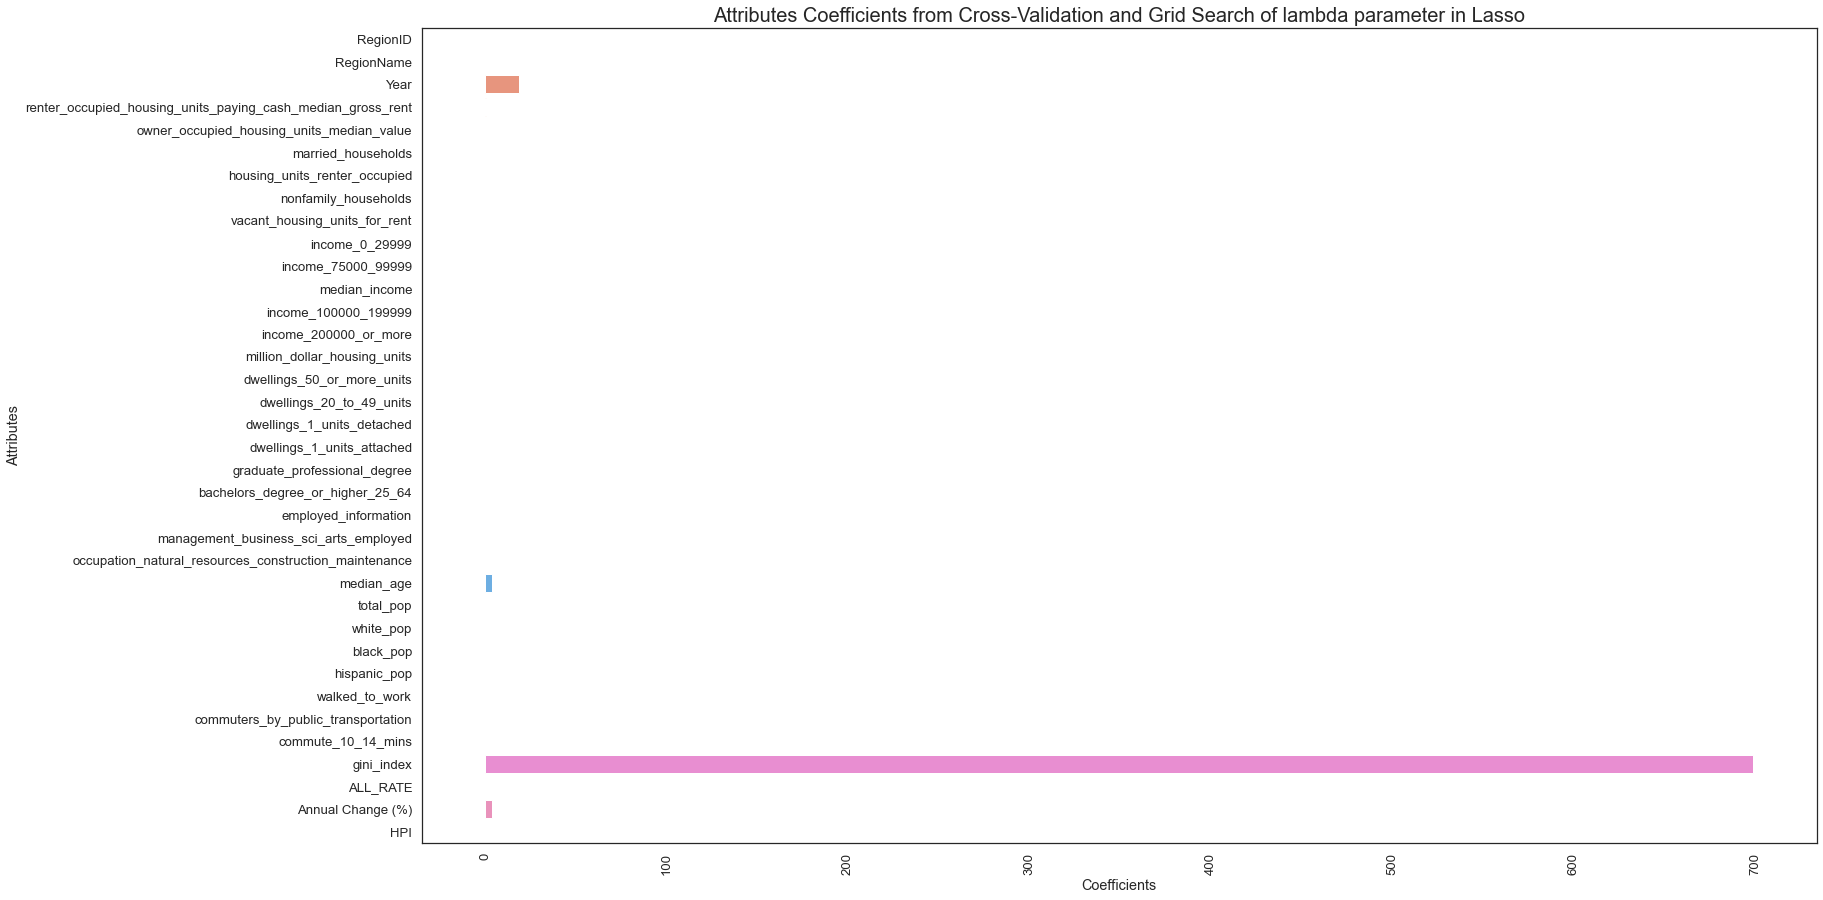

In [90]:
sns.set(rc={'figure.figsize':(25,15)}, font_scale =1.2)
sns.set_style("white")
sns.barplot(y='Attributes', x='Coefficients', data=lasso_optimalCoefs)
plt.title('Attributes Coefficients from Cross-Validation and Grid Search of lambda parameter in Lasso', size =20)
plt.xticks(rotation = 90)

plt.show()

#### After dropping the cofficients that Lasso turned 0

In [91]:
# Features with coefficients that came out 0 above
lasso_optimalCoefs0 = lasso_optimalCoefs.loc[lasso_optimalCoefs['Coefficients']==0]
#lasso_optimalCoefs0

In [71]:
# 1 feature has been removed by lasso, leaving 32
lasso_optimalCoefs0.shape

(1, 2)

In [92]:
# Dropped these columns from train and test sets
zacsehX_train = zacsehX_train.drop(lasso_optimalCoefs0['Attributes'].tolist(), axis = 1)
zacsehX_test = zacsehX_test.drop(lasso_optimalCoefs0['Attributes'].tolist(), axis = 1)

In [99]:
# Final MLR on the remaining features
zacseh1 = LinearRegression(normalize=True)
zacseh1.fit(zacsehX_train, zacsehy_train)

LinearRegression(normalize=True)

In [100]:
#Scores for train and test sets
print("R^2 for train set: %f" %zacseh1.score(zacsehX_train, zacsehy_train))
print('-'*50)
print("R^2 for test  set: %f" %zacseh1.score(zacsehX_test, zacsehy_test))

R^2 for train set: 0.842978
--------------------------------------------------
R^2 for test  set: 0.843293


In [101]:
# RMSE for Model zacseh1 
mean_squared_error(zacsehy_test, zacseh1.predict(zacsehX_test), squared = False)

197.62337959981758

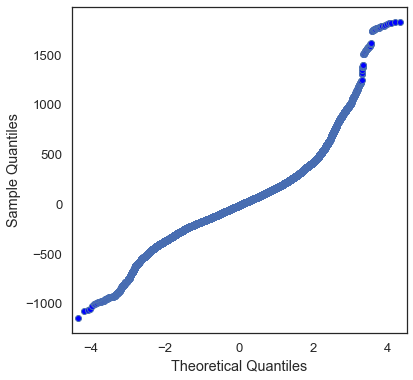

                            OLS Regression Results                            
Dep. Variable:                   ZORI   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                 2.102e+04
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:02:06   Log-Likelihood:            -9.1980e+05
No. Observations:              137091   AIC:                         1.840e+06
Df Residuals:                  137055   BIC:                         1.840e+06
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [131]:
# Statsmodel to get the p-values
sns.set(rc={'figure.figsize':(6,6)}, font_scale =1.2)
sns.set_style("white")
import statsmodels.api as sm 
zacsehX_add_const = sm.add_constant(zacsehX_train)
zacseh_sm = sm.OLS(zacsehy_train, zacsehX_add_const)
fitted = zacseh_sm.fit()
res = fitted.resid
fig = sm.qqplot(res)
plt.show()
print(fitted.summary())

#### MULTIVARIATE LINEAR REGRESSION

In [77]:
zacs_features1 = pd.read_csv("zacs_features1.csv", index_col=0)

In [78]:
# computing gradient of ZORI with respect to year for each zipcode
zips = zacs_features1.RegionName.unique()
zoriGrad = [] 
for z in zips:
    zoriGrad.append(np.gradient(zacs_features1[zacs_features1['RegionName'] == z]['ZORI']))
zoriGrad =[item for sublist in zoriGrad for item in sublist]
len(zoriGrad)

155724

In [79]:
slope = pd.DataFrame({'Grad':zoriGrad})
zacs_features1grad = pd.concat([zacs_features1, slope], axis=1 )
zacs_features1grad.to_csv("zacs_features1grad.csv")

In [80]:
# create categorical feature for gradient in 2020
zacs_f1grad_cat = zacs_features1grad[zacs_features1grad['Year']>2019].groupby('RegionName')['Grad']
#zacs_f1grad_cat['COVID_Change']=zacs_f1grad_cat['Grad'].apply(lambda x: 'Increase' if x>1 else 'Decrease' if x<-1 else 'Flat')

In [81]:
zacs_features1grad[zacs_features1grad['Year']>2019]

,RegionName,ZORI,Year,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_median_value,married_households,housing_units_renter_occupied,nonfamily_households,vacant_housing_units_for_rent,income_10000_29999,...,median_age,total_pop,white_pop,black_pop,hispanic_pop,walked_to_work,commuters_by_public_transportation,commute_10_14_mins,gini_index,Grad
